In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [4]:
dataframe = pd.read_csv('UCI_Credit_Card.csv')
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
dataframe = dataframe.drop('ID', axis=1, errors='ignore')
correlations = dataframe.corr()
correlations['default.payment.next.month'].sort_values(ascending=False)
print(correlations)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

In [6]:
dataframe.shape

(30000, 24)

In [7]:

df = dataframe.copy()
df = df.drop_duplicates()
print(f"Total Duplicates = ", df.duplicated().sum())
print(f"Total features = {len(df.columns[:-1])}")
print(f"Label = {df.columns[-1]}")

Total Duplicates =  0
Total features = 23
Label = default.payment.next.month


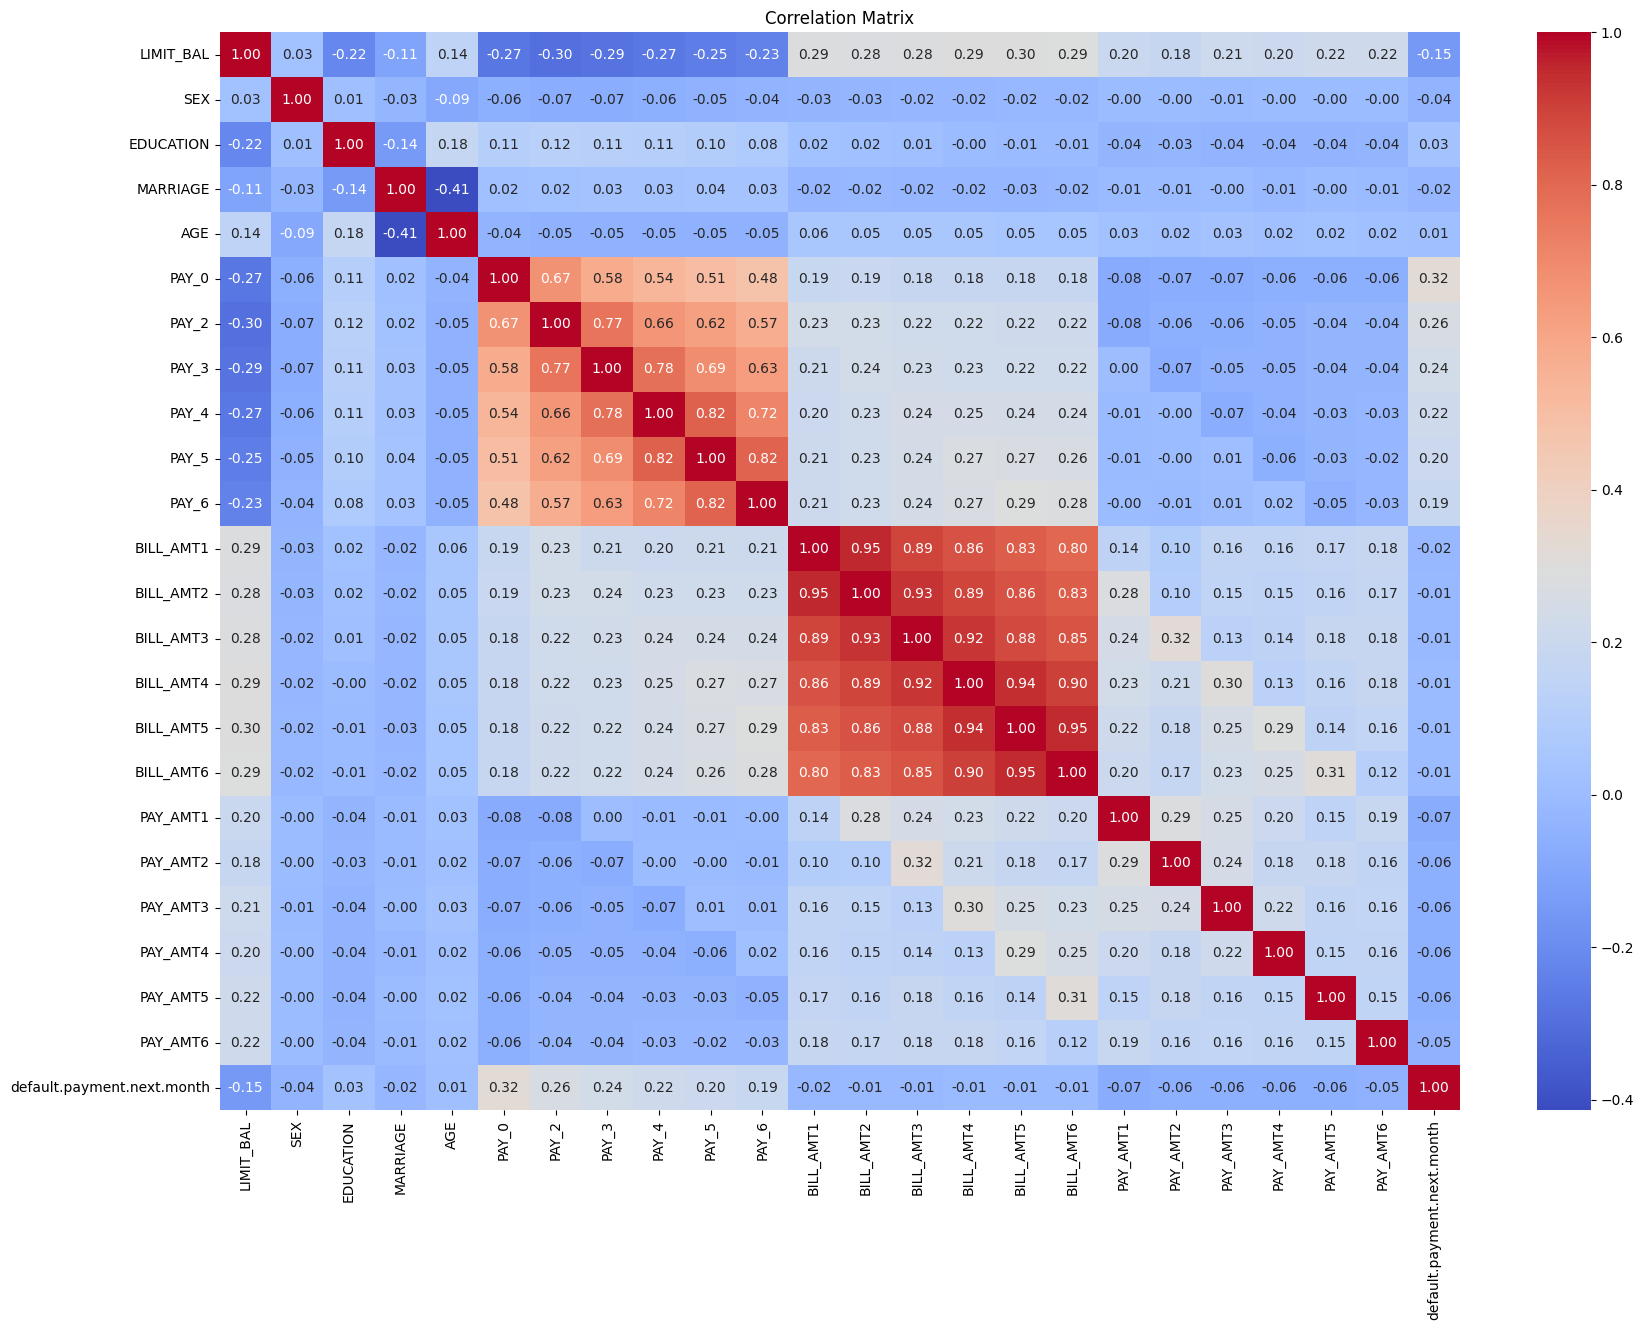

In [8]:
corr=df.corr()
#  Heatmap
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# correlation with target
corr_target = corr['default.payment.next.month'].sort_values(ascending=False)

### Data Visualization

In [9]:
from sklearn.model_selection import train_test_split
df1 = df.copy()
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)
#Taking mean of Pay
# Pay = [f'PAY_{i}' for i in range(7) if i!=1]
# Bill_AMT = [f'BILL_AMT{i}' for i in range(1,7) if i!=1]
# PAY_AMT = [f'PAY_AMT{i}' for i in range(1,7) if i!=1]

# df['PAY_AVG'] = df[Pay].mean(axis=1)
# df['Bill_AMT_AVG'] = df[Bill_AMT].mean(axis=1)
# df['PAY_AMT_AVG'] = df[PAY_AMT].mean(axis=1)

# df = df.drop(columns=Pay + Bill_AMT + PAY_AMT)
print(f"Total Columns \n{df.columns}")
# print(f"BILL AMT Avg = {Bill_AMT_mean}")
# print(f"BILL AMT Avg = {PAY_AMT_mean}")
# print(f"Columns: \n {df.columns}")

Total Columns 
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


#### Balancing and Spliting data

In [13]:
over = RandomOverSampler()

X= df.drop(['default'],axis=1)
y=df['default']
print(f"Total default = {len(y[y == 1])}")
print(f"Total non default = {len(y[y == 0])}")

X, y = over.fit_resample(X, y)

print(f"Total default = {len(y[y == 1])}")
print(f"Total non default = {len(y[y == 0])}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Total default = 6630
Total non default = 23335
Total default = 23335
Total non default = 23335


In [58]:
X_train.skew()

LIMIT_BAL     1.106703
SEX          -0.369211
EDUCATION     0.851697
MARRIAGE      0.033670
AGE           0.708403
PAY_0         0.727187
PAY_2         0.680241
PAY_3         0.798391
PAY_4         1.004977
PAY_5         1.069053
PAY_6         1.008538
BILL_AMT1     2.808054
BILL_AMT2     2.830914
BILL_AMT3     2.813600
BILL_AMT4     2.860370
BILL_AMT5     2.909175
BILL_AMT6     2.860162
PAY_AMT1     16.386555
PAY_AMT2     23.090384
PAY_AMT3     19.612285
PAY_AMT4     13.821434
PAY_AMT5     12.452937
PAY_AMT6     11.160200
dtype: float64

In [59]:
from sklearn.preprocessing import PowerTransformer

# pay_amt_cols = [f"PAY_AMT{i}" for i in range(1, 7)]
# pt = PowerTransformer(method='yeo-johnson')
# for col in pay_amt_cols:
#     X_train[col] = pt.fit_transform(X_train[[col]])
#     X_test[col] = pt.transform(X_test[[col]])
#     print(f"{col} skewness after transform:", X_train[col].skew())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report

lr = LogisticRegression(
    max_iter=1000,
    penalty="l2",
    C=1.0,
    solver="liblinear",
    random_state=42
    )

lr.fit(X_train, y_train)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train, y_train)

Y_predict = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, Y_predict)
print(f"Confusion Matrics: \n{cnf_matrix}")
print("F1-score:", f1_score(y_test, Y_predict, average="weighted"))

print("\nClassification Report:\n", classification_report(y_test, Y_predict))

Confusion Matrics: 
[[3041 1632]
 [1719 2954]]
F1-score: 0.641419815792158

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      4673
           1       0.64      0.63      0.64      4673

    accuracy                           0.64      9346
   macro avg       0.64      0.64      0.64      9346
weighted avg       0.64      0.64      0.64      9346



### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight={0:1, 1:4},
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
importance = rf.feature_importances_

feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

BILL_AMT1    0.068120
PAY_0        0.066508
LIMIT_BAL    0.063834
PAY_AMT1     0.060571
PAY_AMT2     0.060282
BILL_AMT2    0.059760
AGE          0.058469
BILL_AMT3    0.056557
PAY_AMT3     0.056053
BILL_AMT4    0.055334
BILL_AMT5    0.054057
BILL_AMT6    0.053371
PAY_AMT6     0.052465
PAY_AMT4     0.050412
PAY_AMT5     0.049167
PAY_2        0.027541
EDUCATION    0.020447
PAY_3        0.019935
PAY_4        0.016048
PAY_6        0.015171
PAY_5        0.014234
MARRIAGE     0.011369
SEX          0.010295
dtype: float64
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4673
           1       0.87      0.97      0.92      4673

    accuracy                           0.91      9346
   macro avg       0.92      0.91      0.91      9346
weighted avg       0.92      0.91      0.91      9346

